In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [217]:
df = pd.read_csv(r"diamonds.csv")

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [219]:
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [220]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [221]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [222]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [223]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


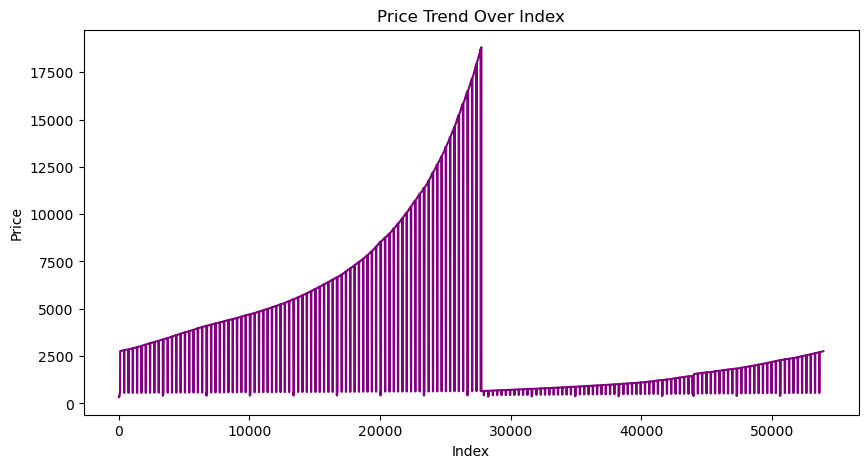

In [224]:
plt.figure(figsize=(10,5))
plt.plot(df['price'], color="purple")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Trend Over Index')
plt.show()

In [225]:
X = df.drop(columns=['price'])  
y = df['price'] 

In [226]:
# Identify categorical & numerical columns
categorical_features = ['cut', 'color', 'clarity']
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [227]:
# Preprocessing pipeline: One-Hot Encoding for categorical variables
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), categorical_features),  
    ("num", "passthrough", numerical_features)  
])

In [228]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [229]:
# Define models with hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # L2 Regularization
    "Lasso Regression": Lasso(alpha=0.1),  # L1 Regularization
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=10, min_samples_split=5)  # Non-linear model
}

In [230]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)  # Create pipeline
    pipeline.fit(X_train, y_train)  # Train model
    y_pred = pipeline.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

In [231]:
# Print evaluation results
for model, metrics in results.items():
    print(f"\n🔹 {model}:")
    print(f"   Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"   Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"   Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"   R² Score: {metrics['R² Score']:.4f}")



🔹 Linear Regression:
   Mean Absolute Error (MAE): 725.27
   Mean Squared Error (MSE): 1215093.90
   Root Mean Squared Error (RMSE): 1102.31
   R² Score: 0.9203

🔹 Ridge Regression:
   Mean Absolute Error (MAE): 725.11
   Mean Squared Error (MSE): 1215116.41
   Root Mean Squared Error (RMSE): 1102.32
   R² Score: 0.9203

🔹 Lasso Regression:
   Mean Absolute Error (MAE): 724.81
   Mean Squared Error (MSE): 1214967.82
   Root Mean Squared Error (RMSE): 1102.26
   R² Score: 0.9203

🔹 Decision Tree Regressor:
   Mean Absolute Error (MAE): 434.68
   Mean Squared Error (MSE): 730959.63
   Root Mean Squared Error (RMSE): 854.96
   R² Score: 0.9520
